# **Inicio**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving 01database.csv to 01database.csv


In [2]:
import pandas as pd
df = pd.read_csv('01database.csv', sep=';', decimal=',')
df.head()

,Generacion,Fec.Nac.,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,...,Matematica 7,Tecnologia 7,E Fisica 7,C Naturales 7,Historia 7,A Visuales 7,A Musicales 7,Prom 7,% 7,Nivel 7
0,2017,21-06-2003,5.7,6.2,6.4,6.0,6.0,6.6,6.8,6.4,...,4.5,6.8,6.0,4.3,5.6,6.7,6.1,5.5,97.0,no avanzado
1,2017,02-08-2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,06-08-2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,10-10-2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.3,6.0,6.4,4.7,4.3,6.9,5.9,5.4,90.0,no avanzado
4,2017,18-12-2003,5.0,5.4,5.6,6.0,6.0,5.4,5.9,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Cantidad de columnas
df.shape[1]

86

# **Limpieza del DataSet**

In [4]:
# Hacer copia de trabajo
df_filtrado = df.copy()

# Calcula el número de valores nulos para cada fila y almacénalo en una nueva columna nulos
df_filtrado['nulos'] = df_filtrado.isnull().sum(axis=1)

#Eliminar estudiantes con mas de 30 columnas nulas
df_filtrado1 = df_filtrado[df_filtrado["nulos"] <= 30].copy()
df_filtrado1.head()

,Generacion,Fec.Nac.,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,...,Tecnologia 7,E Fisica 7,C Naturales 7,Historia 7,A Visuales 7,A Musicales 7,Prom 7,% 7,Nivel 7,nulos
0,2017,21-06-2003,5.7,6.2,6.4,6.0,6.0,6.6,6.8,6.4,...,6.8,6.0,4.3,5.6,6.7,6.1,5.5,97.0,no avanzado,0
5,2017,27-03-2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.7,4.0,4.3,6.3,6.1,5.4,98.0,no avanzado,10
6,2017,01-04-2004,4.0,5.7,5.5,5.2,5.2,6.9,6.9,6.7,...,7.0,6.8,5.3,5.4,6.8,6.9,5.9,98.0,no avanzado,0
7,2017,26-04-2004,6.5,5.9,6.7,6.2,6.2,5.3,6.2,6.8,...,6.9,6.7,4.9,4.4,6.3,5.3,5.6,95.0,no avanzado,0
8,2017,03-05-2004,5.4,6.6,6.5,6.1,6.1,6.0,5.9,6.6,...,6.9,6.9,4.9,5.8,6.9,5.7,6.0,97.0,avanzado,0


In [5]:
# Columnas de promedios anuales
columnas_promedios = ['Prom 1', 'Prom 2', 'Prom 3', 'Prom 4', 'Prom 5', 'Prom 6']

# Reemplazar ',' por '.' y convertir a float en las columnas de promedio
for col in columnas_promedios:
    if col in df_filtrado1.columns:
        # Verificar tipo de dato antes de aplicar .str
        if df_filtrado1[col].dtype == 'object':
            df_filtrado1[col] = df_filtrado1[col].str.replace(',', '.', regex=False).astype(float)
        else:
            try:
                df_filtrado1[col] = df_filtrado1[col].astype(float)
            except ValueError:
                print(f"Warning: No se pudo convertir la columna '{col}' a float.")

# Calcular el promedio general del estudiante a partir de Prom 1 a Prom 6
df_filtrado1['Promedio_general_estudiante'] = df_filtrado1[columnas_promedios].mean(axis=1).round(1)

# Paso adicional: intentar convertir columnas tipo texto a float si es posible
for col in df_filtrado1.columns:
    if df_filtrado1[col].dtype == object:
        df_filtrado1[col] = df_filtrado1[col].str.replace(',', '.', regex=False)
        try:
            df_filtrado1[col] = df_filtrado1[col].astype(float)
        except ValueError:
            continue  # Si no se puede convertir, se ignora

# Imputar valores faltantes con el promedio general del estudiante
for col in df_filtrado1.columns:
    if col != 'Nivel 7':  # No modificar la variable categórica objetivo
        if df_filtrado1[col].dtype in ['float64', 'int64']:
            df_filtrado1[col] = df_filtrado1[col].fillna(df_filtrado1['Promedio_general_estudiante'])

# Mostrar primeras filas del dataset procesado
df_filtrado1.head()


,Generacion,Fec.Nac.,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,...,E Fisica 7,C Naturales 7,Historia 7,A Visuales 7,A Musicales 7,Prom 7,% 7,Nivel 7,nulos,Promedio_general_estudiante
0,2017,21-06-2003,5.7,6.2,6.4,6.0,6.0,6.6,6.8,6.4,...,6.0,4.3,5.6,6.7,6.1,5.5,97.0,no avanzado,0,5.6
5,2017,27-03-2004,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,...,6.7,4.0,4.3,6.3,6.1,5.4,98.0,no avanzado,10,5.7
6,2017,01-04-2004,4.0,5.7,5.5,5.2,5.2,6.9,6.9,6.7,...,6.8,5.3,5.4,6.8,6.9,5.9,98.0,no avanzado,0,5.5
7,2017,26-04-2004,6.5,5.9,6.7,6.2,6.2,5.3,6.2,6.8,...,6.7,4.9,4.4,6.3,5.3,5.6,95.0,no avanzado,0,5.7
8,2017,03-05-2004,5.4,6.6,6.5,6.1,6.1,6.0,5.9,6.6,...,6.9,4.9,5.8,6.9,5.7,6.0,97.0,avanzado,0,6.1


In [6]:
# Mostrar en cuantas filas Nivel 7 es nulo
df_filtrado1["Nivel 7"].isnull().sum()

np.int64(19)

In [7]:
#eliminar filas donde esté nivel 7 sea nulo
df_filtrado2 = df_filtrado1[df_filtrado1["Nivel 7"].notnull()]
df_filtrado2.head()

,Generacion,Fec.Nac.,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,...,E Fisica 7,C Naturales 7,Historia 7,A Visuales 7,A Musicales 7,Prom 7,% 7,Nivel 7,nulos,Promedio_general_estudiante
0,2017,21-06-2003,5.7,6.2,6.4,6.0,6.0,6.6,6.8,6.4,...,6.0,4.3,5.6,6.7,6.1,5.5,97.0,no avanzado,0,5.6
5,2017,27-03-2004,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,...,6.7,4.0,4.3,6.3,6.1,5.4,98.0,no avanzado,10,5.7
6,2017,01-04-2004,4.0,5.7,5.5,5.2,5.2,6.9,6.9,6.7,...,6.8,5.3,5.4,6.8,6.9,5.9,98.0,no avanzado,0,5.5
7,2017,26-04-2004,6.5,5.9,6.7,6.2,6.2,5.3,6.2,6.8,...,6.7,4.9,4.4,6.3,5.3,5.6,95.0,no avanzado,0,5.7
8,2017,03-05-2004,5.4,6.6,6.5,6.1,6.1,6.0,5.9,6.6,...,6.9,4.9,5.8,6.9,5.7,6.0,97.0,avanzado,0,6.1


In [8]:
# Verificacion de que se eliminaron los nulos de nivel 7
df_filtrado2["Nivel 7"].isnull().sum()

np.int64(0)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame de trabajo
df_filtrado3 = df_filtrado2.copy()

# Crear el codificador
le = LabelEncoder()

# Codificar la variable 'Nivel 7' como numérica: avanzado 1, no avanzado 0
df_filtrado3["Nivel 7 codificado"] = 1 - le.fit_transform(df_filtrado3["Nivel 7"])
df_filtrado3.head()

,Generacion,Fec.Nac.,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,...,C Naturales 7,Historia 7,A Visuales 7,A Musicales 7,Prom 7,% 7,Nivel 7,nulos,Promedio_general_estudiante,Nivel 7 codificado
0,2017,21-06-2003,5.7,6.2,6.4,6.0,6.0,6.6,6.8,6.4,...,4.3,5.6,6.7,6.1,5.5,97.0,no avanzado,0,5.6,0
5,2017,27-03-2004,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,...,4.0,4.3,6.3,6.1,5.4,98.0,no avanzado,10,5.7,0
6,2017,01-04-2004,4.0,5.7,5.5,5.2,5.2,6.9,6.9,6.7,...,5.3,5.4,6.8,6.9,5.9,98.0,no avanzado,0,5.5,0
7,2017,26-04-2004,6.5,5.9,6.7,6.2,6.2,5.3,6.2,6.8,...,4.9,4.4,6.3,5.3,5.6,95.0,no avanzado,0,5.7,0
8,2017,03-05-2004,5.4,6.6,6.5,6.1,6.1,6.0,5.9,6.6,...,4.9,5.8,6.9,5.7,6.0,97.0,avanzado,0,6.1,1


In [10]:
from sklearn.preprocessing import StandardScaler

# Crear lista de columnas a normalizar (solo numéricas útiles, excluyendo las no predictoras)
columnas_a_excluir = ["Generacion", "Fec.Nac.", "Nivel 7", "Nivel 7 codificado", "nulos"]
features = [col for col in df_filtrado3.columns if col not in columnas_a_excluir and df_filtrado3[col].dtype in [float, int]]

# Inicializar el normalizador
scaler = StandardScaler()

# Aplicar normalización
df_scaled = pd.DataFrame(scaler.fit_transform(df_filtrado3[features]), columns=features).round(3)

# Agregar la variable objetivo codificada
df_scaled["Nivel 7 codificado"] = df_filtrado3["Nivel 7 codificado"].values

# Mostrar primeras filas del DataFrame escalado
df_scaled.head()


,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,Prom 1,% 1,...,Tecnologia 7,E Fisica 7,C Naturales 7,Historia 7,A Visuales 7,A Musicales 7,Prom 7,% 7,Promedio_general_estudiante,Nivel 7 codificado
0,-0.600,-0.387,0.580,-0.703,-0.485,0.004,0.635,-0.818,-0.217,0.444,...,0.707,-1.218,-1.517,-0.236,0.195,-0.416,-0.855,0.420,-1.291,0
1,-0.600,-1.375,-0.734,-1.401,-1.119,-2.234,-2.214,-2.732,-1.805,-3.215,...,-0.379,0.125,-1.849,-1.675,-0.393,-0.416,-1.015,0.627,-1.040,0
2,-3.173,-1.375,-1.109,-2.564,-2.176,0.749,0.894,0.002,-1.540,0.326,...,0.979,0.317,-0.411,-0.458,0.342,0.799,-0.215,0.627,-1.542,0
3,0.611,-0.980,1.143,-0.238,-0.062,-3.228,-0.919,0.275,-0.481,0.404,...,0.843,0.125,-0.853,-1.564,-0.393,-1.631,-0.695,0.007,-1.040,0
4,-1.054,0.404,0.768,-0.470,-0.274,-1.488,-1.696,-0.271,-0.481,0.483,...,0.843,0.509,-0.853,-0.015,0.489,-1.023,-0.055,0.420,-0.036,1


In [11]:
df_final = df_scaled.copy()

# Identificar columnas que hacen referencia a 7° básico (excepto "Nivel 7")
columnas_7basico = [col for col in df_final.columns if " 7" in col and "Nivel" not in col]

# Eliminar esas columnas
df_final = df_final.drop(columns=columnas_7basico)
df_final.head(28)

,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,Prom 1,% 1,...,C Naturales 6,Historia 6,Exp Oral y Escrita 6,Razonamiento Mat 6,A Visuales 6,A Musicales 6,Prom 6,% 6,Promedio_general_estudiante,Nivel 7 codificado
0,-0.600,-0.387,0.580,-0.703,-0.485,0.004,0.635,-0.818,-0.217,0.444,...,-1.289,0.427,-0.651,-0.903,-0.806,-0.558,-1.112,0.581,-1.291,0
1,-0.600,-1.375,-0.734,-1.401,-1.119,-2.234,-2.214,-2.732,-1.805,-3.215,...,-1.558,-1.108,-0.974,-1.134,-3.250,-0.940,-1.488,0.294,-1.040,0
2,-3.173,-1.375,-1.109,-2.564,-2.176,0.749,0.894,0.002,-1.540,0.326,...,-1.826,-0.829,-0.651,-1.365,0.171,0.206,-0.925,0.581,-1.542,0
3,0.611,-0.980,1.143,-0.238,-0.062,-3.228,-0.919,0.275,-0.481,0.404,...,-0.753,-0.550,-0.651,0.020,-1.784,-1.703,-0.737,0.151,-1.040,0
4,-1.054,0.404,0.768,-0.470,-0.274,-1.488,-1.696,-0.271,-0.481,0.483,...,-1.021,0.427,-0.329,0.250,0.823,-1.131,-0.362,0.151,-0.036,1
5,0.157,0.206,0.580,-0.470,-0.274,0.501,0.894,0.549,0.313,0.091,...,-0.484,-0.410,-0.490,-0.211,0.008,-0.749,-0.549,0.581,-0.287,0
6,0.611,0.404,0.956,-0.703,-0.485,0.501,0.894,0.002,0.578,0.365,...,0.991,0.985,0.478,1.404,0.497,-0.176,0.952,0.724,0.718,1
7,0.914,-0.387,1.706,0.460,0.572,0.749,0.635,0.002,0.842,0.248,...,-1.289,-1.247,-0.974,-0.557,-0.480,-1.322,-0.925,-1.424,-0.287,0
8,-3.930,-1.573,-1.485,-1.401,-1.119,-0.742,-1.178,-0.545,-2.070,0.248,...,0.321,0.427,-0.329,-0.442,0.823,-0.558,0.014,0.581,-1.291,0
9,0.914,0.997,0.768,0.693,0.783,0.501,1.152,0.822,1.107,0.404,...,1.126,1.683,0.962,1.058,0.823,0.397,1.327,0.724,1.471,1


#**Entrenamiento del modelo**

## ***1. Random Forest Classifier***




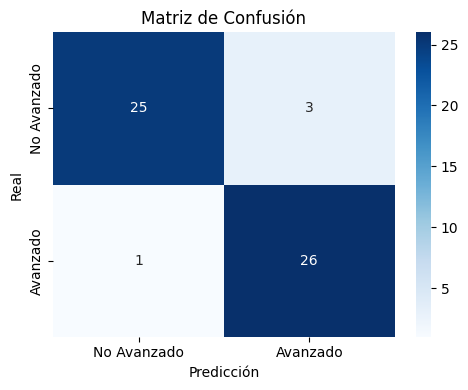

Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.96,0.89,0.93,28.00
1,0.90,0.96,0.93,27.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.93,0.93,0.93,55.00
weighted avg,0.93,0.93,0.93,55.00


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separar X características e y etiqueta
X = df_final.drop('Nivel 7 codificado', axis=1)
y = df_final['Nivel 7 codificado']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Entrenar modelo
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# Predicciones
y_pred1 = model1.predict(X_test)

# Métricas
accuracy1 = accuracy_score(y_test, y_pred1)

# 7. Matriz de confusión como imagen
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Avanzado', 'Avanzado'],
            yticklabels=['No Avanzado', 'Avanzado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

# 8. Reporte de clasificación como DataFrame
report = classification_report(y_test, y_pred1, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("Reporte de Clasificación:")
display(df_report.round(2))

##  ***2. Gradient Boosting***

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:19:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


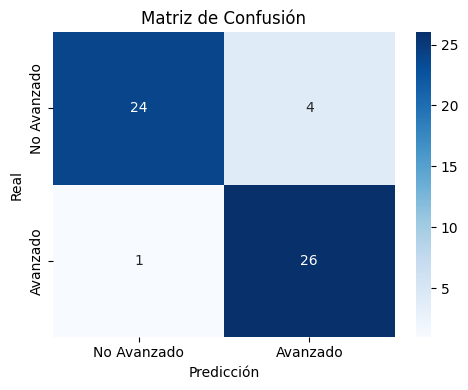

Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.96,0.86,0.91,28.00
1,0.87,0.96,0.91,27.00
accuracy,0.91,0.91,0.91,0.91
macro avg,0.91,0.91,0.91,55.00
weighted avg,0.91,0.91,0.91,55.00


In [13]:
from xgboost import XGBClassifier

model2 = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model2.fit(X_train, y_train)

# Predicciones
y_pred2 = model2.predict(X_test)

# Métricas
accuracy2 = accuracy_score(y_test, y_pred2)

# 7. Matriz de confusión como imagen
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Avanzado', 'Avanzado'],
            yticklabels=['No Avanzado', 'Avanzado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

# 8. Reporte de clasificación como DataFrame
report = classification_report(y_test, y_pred2, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("Reporte de Clasificación:")
display(df_report.round(2))


## ***3. Regresión Logística***

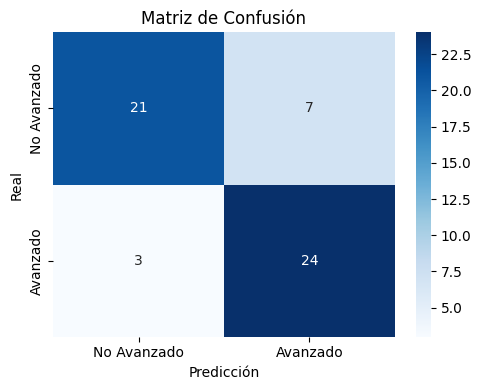

Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.88,0.75,0.81,28.00
1,0.77,0.89,0.83,27.00
accuracy,0.82,0.82,0.82,0.82
macro avg,0.82,0.82,0.82,55.00
weighted avg,0.83,0.82,0.82,55.00


In [14]:
from sklearn.linear_model import LogisticRegression

model3 =  LogisticRegression(max_iter=1000)
model3.fit(X_train, y_train)

# Predicciones
y_pred3 = model3.predict(X_test)

# Métricas
accuracy3 = accuracy_score(y_test, y_pred3)

# 7. Matriz de confusión como imagen
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Avanzado', 'Avanzado'],
            yticklabels=['No Avanzado', 'Avanzado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

# 8. Reporte de clasificación como DataFrame
report = classification_report(y_test, y_pred3, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("Reporte de Clasificación:")
display(df_report.round(2))

## ***4. K-Nearest Neighbors***

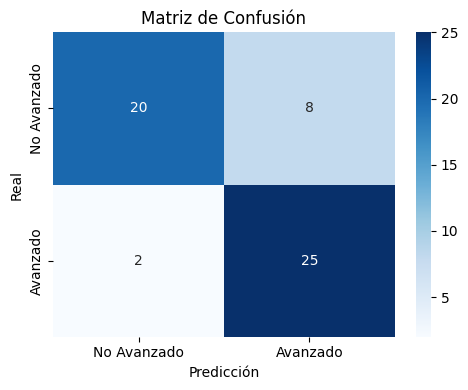

Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.91,0.71,0.80,28.00
1,0.76,0.93,0.83,27.00
accuracy,0.82,0.82,0.82,0.82
macro avg,0.83,0.82,0.82,55.00
weighted avg,0.83,0.82,0.82,55.00


In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Modelo
model4 = KNeighborsClassifier(n_neighbors=5)
model4.fit(X_train, y_train)

# Predicciones
y_pred4 = model4.predict(X_test)

# Métricas
accuracy4 = accuracy_score(y_test, y_pred4)

# 7. Matriz de confusión como imagen
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Avanzado', 'Avanzado'],
            yticklabels=['No Avanzado', 'Avanzado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

# 8. Reporte de clasificación como DataFrame
report = classification_report(y_test, y_pred4, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("Reporte de Clasificación:")
display(df_report.round(2))

## ***5. MLPClassifier***

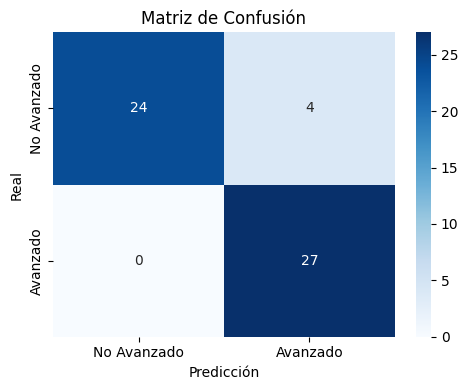

Reporte de Clasificación:


,precision,recall,f1-score,support
0,1.00,0.86,0.92,28.00
1,0.87,1.00,0.93,27.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.94,0.93,0.93,55.00
weighted avg,0.94,0.93,0.93,55.00


In [16]:
import numpy as np
from sklearn.neural_network import MLPClassifier

# Modelo
model5 =  MLPClassifier(hidden_layer_sizes=(100,),
                    max_iter=500,
                    activation='relu',
                    solver='adam',
                    random_state=42)
model5.fit(X_train, y_train)

# Predicciones
y_pred5 = model5.predict(X_test)

# Métricas
accuracy5 = accuracy_score(y_test, y_pred5)

# 7. Matriz de confusión como imagen
cm = confusion_matrix(y_test, y_pred5)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Avanzado', 'Avanzado'],
            yticklabels=['No Avanzado', 'Avanzado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

# 8. Reporte de clasificación como DataFrame
report = classification_report(y_test, y_pred5, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("Reporte de Clasificación:")
display(df_report.round(2))

# ***Codigo de entrenamiento depurado y eleccion del modelo***

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Alineacion de indices
df_final.index = df_filtrado3.index
# Separar características (X) y variable objetivo (y)
X = df_final.drop('Nivel 7 codificado', axis=1)
y = df_final['Nivel 7 codificado']

# División entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


def entrenar_y_evaluar(modelo, nombre_modelo):
    # Entrenamiento
    modelo.fit(X_train, y_train)

    # Predicción
    y_pred = modelo.predict(X_test)

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{nombre_modelo} - Accuracy: {accuracy:.2f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Avanzado', 'Avanzado'],
                yticklabels=['No Avanzado', 'Avanzado'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.tight_layout()
    plt.show()

    # Reporte
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    print(f"Reporte de Clasificación - {nombre_modelo}:")
    display(df_report.round(2))

    return accuracy, df_report

Random Forest - Accuracy: 0.93


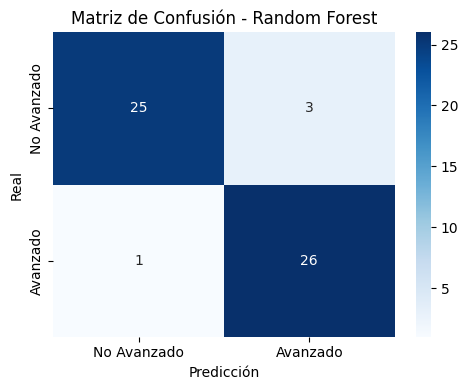

Reporte de Clasificación - Random Forest:


,precision,recall,f1-score,support
0,0.96,0.89,0.93,28.00
1,0.90,0.96,0.93,27.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.93,0.93,0.93,55.00
weighted avg,0.93,0.93,0.93,55.00


XGBoost - Accuracy: 0.91


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:22:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


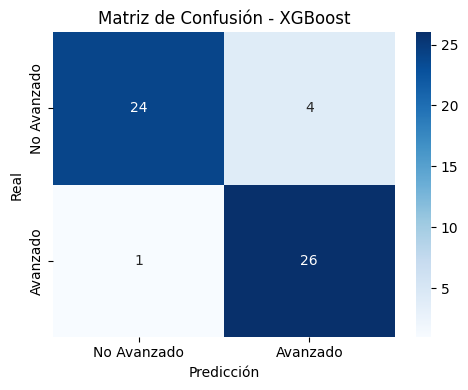

Reporte de Clasificación - XGBoost:


,precision,recall,f1-score,support
0,0.96,0.86,0.91,28.00
1,0.87,0.96,0.91,27.00
accuracy,0.91,0.91,0.91,0.91
macro avg,0.91,0.91,0.91,55.00
weighted avg,0.91,0.91,0.91,55.00


Logistic Regression - Accuracy: 0.82


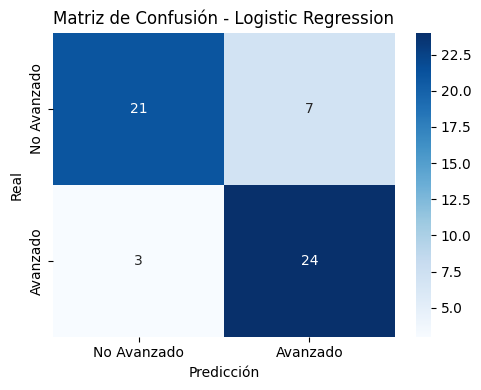

Reporte de Clasificación - Logistic Regression:


,precision,recall,f1-score,support
0,0.88,0.75,0.81,28.00
1,0.77,0.89,0.83,27.00
accuracy,0.82,0.82,0.82,0.82
macro avg,0.82,0.82,0.82,55.00
weighted avg,0.83,0.82,0.82,55.00


KNN - Accuracy: 0.82


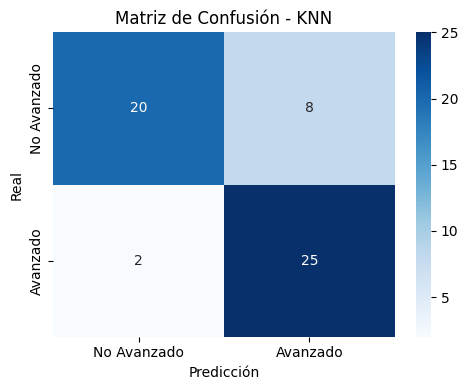

Reporte de Clasificación - KNN:


,precision,recall,f1-score,support
0,0.91,0.71,0.80,28.00
1,0.76,0.93,0.83,27.00
accuracy,0.82,0.82,0.82,0.82
macro avg,0.83,0.82,0.82,55.00
weighted avg,0.83,0.82,0.82,55.00


MLP - Accuracy: 0.93


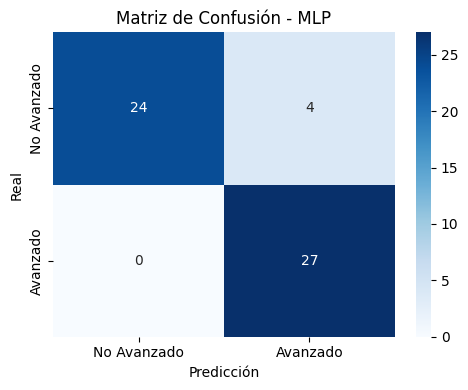

Reporte de Clasificación - MLP:


,precision,recall,f1-score,support
0,1.00,0.86,0.92,28.00
1,0.87,1.00,0.93,27.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.94,0.93,0.93,55.00
weighted avg,0.94,0.93,0.93,55.00


In [18]:
# Inicialización de modelos
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Guardar métricas
resultados_accuracy = {}
reportes = {}

for nombre, modelo in modelos.items():
    print("="*60)
    acc, reporte = entrenar_y_evaluar(modelo, nombre)
    resultados_accuracy[nombre] = acc
    reportes[nombre] = reporte


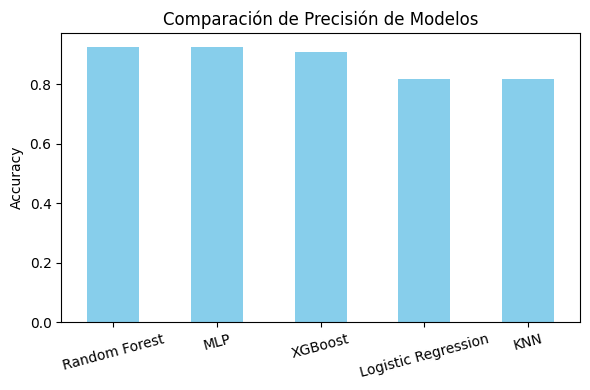

In [19]:
# Gráfico de comparación de exactitud
plt.figure(figsize=(6,4))
pd.Series(resultados_accuracy).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Comparación de Precisión de Modelos')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [20]:
# Comparar métricas por modelo (weighted avg)
metricas = ['precision', 'recall', 'f1-score']
tabla_comparativa = pd.DataFrame(columns=metricas)

for nombre, reporte in reportes.items():
    if 'weighted avg' in reporte.index:
        fila = reporte.loc['weighted avg', metricas]
        tabla_comparativa.loc[nombre] = fila

# Agregar Accuracy (CV y Test)
tabla_comparativa['Accuracy Test'] = pd.Series(resultados_accuracy)

# Mostrar tabla comparativa
print("Tabla comparativa final de modelos:")
display(tabla_comparativa.round(2))


Tabla comparativa final de modelos:


,precision,recall,f1-score,Accuracy Test
Random Forest,0.93,0.93,0.93,0.93
XGBoost,0.91,0.91,0.91,0.91
Logistic Regression,0.83,0.82,0.82,0.82
KNN,0.83,0.82,0.82,0.82
MLP,0.94,0.93,0.93,0.93


 Luego de evaluar los cinco modelos de clasificación para predecir el nivel académico de los estudiantes al ingresar a 7° básico, considerando las metricas **precisión**, **recall**, **f1-score** y **exactitud**, podemos evidenciar que **Random Forest** y **MLPClassifier** alcanzaron el mejor desempeño entregando resultados similares. Sin embargo, hemos decidido optar por **Random Forest** como modelo óptimo debido a las siguientes razones:

- **Interpretabilidad**: permite analizar la importancia de cada variable predictora.
- **Facilidad de ajuste**: requiere menos configuración y es más estable que redes neuronales.
- **Eficiencia computacional**: más rápido de entrenar que el MLP y menos sensible a la escala de datos.
- **Robustez**: maneja mejor los datos ruidosos y la varianza entre generaciones de estudiantes.